In [1]:
#start by bringing in data processing libraries
import pandas as pd
import numpy as np
import timeit #timing functionality

df = pd.read_csv("C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\census.csv")
df.head() #displays the first 5 rows by default


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [2]:
(df.where(df["SUMLEV"]==50)
         .dropna() #drop missing values by default
         .set_index(["STNAME", "CTYNAME"])
         .rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"}))
                 

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [3]:
# The traditional, non-pandorable method
df = df[df["SUMLEV"]==50]
df.set_index(["STNAME", "CTYNAME"], inplace=True)
df.rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [4]:
def first_approach():
    global df
    return (df.where(df["SUMLEV"]==50)
         .dropna()
         .set_index(["STNAME", "CTYNAME"])
         .rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"}))
df = pd.read_csv("C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\census.csv")
timeit.timeit(first_approach, number = 10)

0.8803671000000008

In [5]:
def second_approach():
    global df
    new_df = df[df["SUMLEV"]==50]
    new_df.set_index(["STNAME", "CTYNAME"], inplace=True)
    return new_df.rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"})
df = pd.read_csv("C:\\Users\\user\\Desktop\\Jupyter notebooks for Data Science\\census.csv")
timeit.timeit(second_approach, number = 10)

0.15111010000000036

In [6]:
def min_max(row):
    data = row[["POPESTIMATE2010",
                "POPESTIMATE2011",
                "POPESTIMATE2012",
                "POPESTIMATE2013",
                "POPESTIMATE2014",
                "POPESTIMATE2015"]]
    return pd.Series({"min": np.min(data), "max": np.max(data)})

In [7]:
df.apply(min_max, axis = "columns"). head()

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861


In [8]:
def min_max(row):
    data = row[["POPESTIMATE2010",
                "POPESTIMATE2011",
                "POPESTIMATE2012",
                "POPESTIMATE2013",
                "POPESTIMATE2014",
                "POPESTIMATE2015"]]
    row["max"] = np.max(data)
    row["min"] = np.min(data)
    return row
df.apply(min_max, axis = "columns")

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


In [9]:
rows = ["POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015"]
df.apply(lambda x: np.max(x[rows]), axis = 1).head()

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

In [10]:
def get_state_region(x):
    northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire",
                 "Rhode Island", "Vermont", "New York", "Pennsylvania"]
    midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]
    south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma","Texas"]
    west = ["Arizona","Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "Califonia", "Hawaii","Oregon", "Washington"]
    
    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else: 
        return "West"

In [11]:
df["state_region"] = df["STNAME"].apply(lambda x: get_state_region(x))

In [12]:
df[["STNAME", "state_region"]].head()

,STNAME,state_region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


In [13]:
# lambda syntax - lambda arguments: expression
x = lambda a : a + 10 

In [14]:
x

<function __main__.<lambda>(a)>

In [15]:
print(x(5))

15


In [16]:
#map(fun, iter)
# Python program to demonstrate working
# of map.

# Return double of n
def addition(n):
	return n + n

# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

[2, 4, 6, 8]


In [17]:
#Pandas - Series
import pandas as pd
import numpy as np

In [18]:
# In Millions
g7_pop = pd.Series([35.467, 63.951, 89.948, 68.665, 127.061, 64.511, 318.523])

In [19]:
g7_pop

0     35.467
1     63.951
2     89.948
3     68.665
4    127.061
5     64.511
6    318.523
dtype: float64

In [20]:
g7_pop.name = "G7 Population in Millions"

In [21]:
g7_pop

0     35.467
1     63.951
2     89.948
3     68.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in Millions, dtype: float64

In [22]:
g7_pop.dtype

dtype('float64')

In [23]:
g7_pop.values

array([ 35.467,  63.951,  89.948,  68.665, 127.061,  64.511, 318.523])

In [24]:
type(g7_pop.values)

numpy.ndarray

In [25]:
g7_pop

0     35.467
1     63.951
2     89.948
3     68.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in Millions, dtype: float64

In [26]:
g7_pop[0]

35.467

In [27]:
g7_pop[1]

63.951

In [28]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [29]:
l = ["a","b","c"]

In [30]:
g7_pop.index = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]

In [31]:
g7_pop

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [32]:
pd.Series({"Canada": 35.467, "France": 63.951, "Germany": 89.948, "Italy": 68.665, "Japan": 127.061, "United Kingdom": 64.511, "United States": 318.523}, name = "G7 Population in millions")

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [33]:
pd.Series([35.467, 63.951, 89.948, 68.665, 127.061, 64.511, 318.523], index = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"], name = "G7 Population in millions")

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [34]:
pd.Series(g7_pop, index = ["France", "Germany", "Italy", "Spain"])

France     63.951
Germany    89.948
Italy      68.665
Spain         NaN
Name: G7 Population in Millions, dtype: float64

Indexing

In [35]:
g7_pop

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [36]:
g7_pop["Canada"]

35.467

In [37]:
g7_pop["Japan"]

127.061

In [38]:
#Numeric position
g7_pop.iloc[0]

35.467

In [39]:
g7_pop.iloc[-1]

318.523

In [40]:
#Selecting multiple elements
g7_pop[["Italy", "France"]]

Italy     68.665
France    63.951
Name: G7 Population in Millions, dtype: float64

In [41]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: G7 Population in Millions, dtype: float64

In [42]:
#Slicing
g7_pop["Canada": "Italy"]

Canada     35.467
France     63.951
Germany    89.948
Italy      68.665
Name: G7 Population in Millions, dtype: float64

Conditional selection (boolean arrays)

In [43]:
g7_pop

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [44]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in Millions, dtype: bool

In [45]:
g7_pop[g7_pop > 70]

Germany           89.948
Japan            127.061
United States    318.523
Name: G7 Population in Millions, dtype: float64

In [46]:
g7_pop.mean()

109.73228571428571

In [47]:
g7_pop[g7_pop > g7_pop.mean()]

Japan            127.061
United States    318.523
Name: G7 Population in Millions, dtype: float64

In [48]:
g7_pop.std()

96.28777189015972

In [49]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std()/2) | (g7_pop > g7_pop.mean() + g7_pop.std()/2)]

France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [50]:
# Where | means not

Operations

In [51]:
g7_pop

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [52]:
g7_pop * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            89948000.0
Italy              68665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in Millions, dtype: float64

In [53]:
g7_pop.mean()

109.73228571428571

In [54]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.499232
Italy             4.229240
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in Millions, dtype: float64

In [55]:
g7_pop["France": "Italy"].mean()

74.188

Boolean arrays

In [56]:
g7_pop

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [57]:
g7_pop > 80

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in Millions, dtype: bool

In [58]:
g7_pop[g7_pop > 80]

Germany           89.948
Japan            127.061
United States    318.523
Name: G7 Population in Millions, dtype: float64

In [59]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           89.948
Japan            127.061
United States    318.523
Name: G7 Population in Millions, dtype: float64

In [60]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     89.948
Japan      127.061
Name: G7 Population in Millions, dtype: float64

Modifying series

In [61]:
g7_pop["Canada"] = 40.5

In [62]:
g7_pop

Canada             40.500
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in Millions, dtype: float64

In [63]:
g7_pop.iloc[-1] = 500

In [64]:
g7_pop

Canada             40.500
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in Millions, dtype: float64

In [65]:
g7_pop[g7_pop < 70] = 99.99

In [66]:
g7_pop

Canada             99.990
France             99.990
Germany            89.948
Italy              99.990
Japan             127.061
United Kingdom     99.990
United States     500.000
Name: G7 Population in Millions, dtype: float64

Data Frames

In [67]:
df = pd.DataFrame({"Population": [35.467, 63.951, 89.948, 68.665, 127.061, 64.511, 318.523], "GDP": [1785387, 2833687, 3874437, 2167744, 4602367, 2950039,
                             17348075], "Surface Area": [9984670, 640679, 357114, 301336, 377930,242495, 9525067], "HDI": [0.913, 0.888, 0.916, 0.873, 0.891, 0.907, 0.915], "Continent": ["America", "Europe", "Europe", "Europe", "Asia", "Europe", "America"]}, columns = ["Population", "GDP", "Surface Area", "HDI", "Continent"])                                                                         

In [68]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,89.948,3874437,357114,0.916,Europe
3,68.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


In [69]:
df.index = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States",]

In [70]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [71]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [72]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [74]:
df.size

35

In [75]:
df.shape

(7, 5)

In [76]:
df.describe() #summary of the statistics

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,109.732286,5.080248e+06,3.061327e+06,0.900429
std,96.287772,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,64.231000,2.500716e+06,3.292250e+05,0.889500
50%,68.665000,2.950039e+06,3.779300e+05,0.907000
75%,108.504500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [77]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [78]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
dtype: int64

Indexing, Selection and Slicing

In [79]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [80]:
df.loc["Canada"]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [81]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [82]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [83]:
df["Population"]

Canada             35.467
France             63.951
Germany            89.948
Italy              68.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

In [84]:
df["Population"].to_frame()

,Population
Canada,35.467
France,63.951
Germany,89.948
Italy,68.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [85]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,89.948,3874437
Italy,68.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [86]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe


In [87]:
df.loc["Italy"]

Population       68.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [88]:
df.loc["France": "Italy"]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe


In [89]:
df.loc["France": "Italy", "Population"]

France     63.951
Germany    89.948
Italy      68.665
Name: Population, dtype: float64

In [90]:
df.loc["France": "Italy", ["Population", "GDP"]]

,Population,GDP
France,63.951,2833687
Germany,89.948,3874437
Italy,68.665,2167744


In [91]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [92]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [93]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [94]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe


In [95]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [96]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,89.948,0.916


In [97]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


Pandas Conditional selection and Modifying DataFrames

In [98]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [99]:
df["Population"] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [100]:
df.loc[df["Population"] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,89.948,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


In [101]:
df.loc[df["Population"] > 70, "Population"]

Germany           89.948
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [102]:
df.loc[df["Population"] > 70, ["Population", "GDP"]]

,Population,GDP
Germany,89.948,3874437
Japan,127.061,4602367
United States,318.523,17348075


Dropping Stuff

In [103]:
df.drop("Canada")

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [104]:
df.drop(["Canada", "Japan"])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [105]:
df.drop(columns = ["Population", "HDI"])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [106]:
df.drop(["Italy", "Canada"], axis = 0)

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [107]:
df.drop(["Population", "HDI"], axis = 1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [108]:
df.drop(["Population", "HDI"], axis = 1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [109]:
df.drop(["Population", "HDI"], axis = "columns")

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [110]:
df.drop(["Canada", "Germany"], axis = "rows")

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


Operations

In [111]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,89.948,3874437
Italy,68.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [112]:
df[["Population", "GDP"]] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.89948,38744.37
Italy,0.68665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


Operations wih Series

In [113]:
crisis = pd.Series([-1_000_000, -0.3], index = ["GDP", "HDI"])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [114]:
df[["GDP", "HDI"]] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


Modifying DataFrames

Adding a new column 

In [115]:
langs = pd.Series(["French", "German", "Italian"],
                  index = ["France", "Germany", "Italy"],
                  name="Language")
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [116]:
df["Language"] = langs

In [117]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,89.948,3874437,357114,0.916,Europe,German
Italy,68.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


Replacing values per column

In [118]:
df.rename(columns = {"HDI": "Human Development Index", "Annual Popcorn Consumption": "APC"}, index = {"United States": "USA", "United Kingdom": "UK", "Argentina": "AR"})

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,89.948,3874437,357114,0.916,Europe,German
Italy,68.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
UK,64.511,2950039,242495,0.907,Europe,NaN
USA,318.523,17348075,9525067,0.915,America,NaN


In [119]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,89.948,3874437,357114,0.916,Europe,German
Italy,68.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [120]:
df.rename(index = str.upper)

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,NaN
FRANCE,63.951,2833687,640679,0.888,Europe,French
GERMANY,89.948,3874437,357114,0.916,Europe,German
ITALY,68.665,2167744,301336,0.873,Europe,Italian
JAPAN,127.061,4602367,377930,0.891,Asia,NaN
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,NaN
UNITED STATES,318.523,17348075,9525067,0.915,America,NaN


In [121]:
df.rename(index = lambda x: x.lower())

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,NaN
france,63.951,2833687,640679,0.888,Europe,French
germany,89.948,3874437,357114,0.916,Europe,German
italy,68.665,2167744,301336,0.873,Europe,Italian
japan,127.061,4602367,377930,0.891,Asia,NaN
united kingdom,64.511,2950039,242495,0.907,Europe,NaN
united states,318.523,17348075,9525067,0.915,America,NaN


Dropping columns

In [122]:
df.drop(columns = "Language", inplace = True)

Adding values

In [123]:
df.append(pd.Series({"Population": 3, "GDP": 5}, name = "China"))

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,89.948,3874437.0,357114.0,0.916,Europe
Italy,68.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America
China,3.000,5.0,NaN,NaN,NaN


Append returns a new DataFrame:

In [124]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,89.948,3874437,357114,0.916,Europe
Italy,68.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


You can directly set the new index and values to the DataFrame:

In [125]:
df.loc["China"] = pd.Series({"Population": 1_400_000_000, "Continent": "Asia"})

In [126]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America
France,6.395100e+01,2833687.0,640679.0,0.888,Europe
Germany,8.994800e+01,3874437.0,357114.0,0.916,Europe
Italy,6.866500e+01,2167744.0,301336.0,0.873,Europe
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe
United States,3.185230e+02,17348075.0,9525067.0,0.915,America
China,1.400000e+09,NaN,NaN,NaN,Asia


We can use drop to just remove a row by index

In [127]:
df.drop("China", inplace = True)

In [128]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,89.948,3874437.0,357114.0,0.916,Europe
Italy,68.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America


More radical index changes

In [129]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387.0,9984670.0,0.913,America
1,France,63.951,2833687.0,640679.0,0.888,Europe
2,Germany,89.948,3874437.0,357114.0,0.916,Europe
3,Italy,68.665,2167744.0,301336.0,0.873,Europe
4,Japan,127.061,4602367.0,377930.0,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
6,United States,318.523,17348075.0,9525067.0,0.915,America


In [130]:
df.set_index("Population")

,GDP,Surface Area,HDI,Continent
Population,,,,
35.467,1785387.0,9984670.0,0.913,America
63.951,2833687.0,640679.0,0.888,Europe
89.948,3874437.0,357114.0,0.916,Europe
68.665,2167744.0,301336.0,0.873,Europe
127.061,4602367.0,377930.0,0.891,Asia
64.511,2950039.0,242495.0,0.907,Europe
318.523,17348075.0,9525067.0,0.915,America


Creating columns from other columns

In [131]:
df[["Population", "GDP"]]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,89.948,3874437.0
Italy,68.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United States,318.523,17348075.0


Pandas expresses this by dividing each series:

In [132]:
df["GDP"] / df ["Population"]

Canada            50339.385908
France            44310.284437
Germany           43074.187308
Italy             31569.853637
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
dtype: float64

In [133]:
df["GDP Per Capita"] = df["GDP"] / df["Population"]

In [134]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,89.948,3874437.0,357114.0,0.916,Europe,43074.187308
Italy,68.665,2167744.0,301336.0,0.873,Europe,31569.853637
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


**Satistical Info**

In [135]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,89.948,3874437.0,357114.0,0.916,Europe,43074.187308
Italy,68.665,2167744.0,301336.0,0.873,Europe,31569.853637
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406


In [136]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,109.732286,5.080248e+06,3.061327e+06,0.900429,43672.683429
std,96.287772,5.494020e+06,4.576187e+06,0.016592,7830.385771
min,35.467000,1.785387e+06,2.424950e+05,0.873000,31569.853637
25%,64.231000,2.500716e+06,3.292250e+05,0.889500,39647.949857
50%,68.665000,2.950039e+06,3.779300e+05,0.907000,44310.284437
75%,108.504500,4.238402e+06,5.082873e+06,0.914000,48034.312941
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [137]:
population = df["Population"]

In [138]:
population.min(), population.max()

(35.467, 318.523)

In [139]:
population.sum()

768.126

In [140]:
population.sum() / len(population) 

109.73228571428571

In [141]:
population.mean()

109.73228571428571

In [142]:
population.std() 

96.28777189015972

In [143]:
population.median() 

68.665

In [144]:
population.describe()

count      7.000000
mean     109.732286
std       96.287772
min       35.467000
25%       64.231000
50%       68.665000
75%      108.504500
max      318.523000
Name: Population, dtype: float64

In [145]:
population.quantile(.25) 

64.231

In [146]:
population.quantile([.2, .4, .6, .8, 1]) 

0.2     64.0630
0.4     66.1726
0.6     81.4348
0.8    119.6384
1.0    318.5230
Name: Population, dtype: float64

**Reading External data and plotting**

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [149]:
df = pd.read_csv("C:\\Users\\user\Desktop\\Jupyter notebooks for Data Science\\btc-market-price.csv")

In [150]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [151]:
df = pd.read_csv("C:\\Users\\user\Desktop\\Jupyter notebooks for Data Science\\btc-market-price.csv", header = None)

In [152]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [153]:
df.columns = ["Timeframe", "Price"]

In [154]:
df.head()

,Timeframe,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [155]:
df.dtypes

Timeframe     object
Price        float64
dtype: object

In [156]:
df.columns = ["Timestamp", "Price"] 

In [157]:
df.shape

(365, 2)

In [158]:
df.info

<bound method DataFrame.info of                Timestamp        Price
0    2017-04-02 00:00:00  1099.169125
1    2017-04-03 00:00:00  1141.813000
2    2017-04-04 00:00:00  1141.600363
3    2017-04-05 00:00:00  1133.079314
4    2017-04-06 00:00:00  1196.307937
..                   ...          ...
360  2018-03-28 00:00:00  7960.380000
361  2018-03-29 00:00:00  7172.280000
362  2018-03-30 00:00:00  6882.531667
363  2018-03-31 00:00:00  6935.480000
364  2018-04-01 00:00:00  6794.105000

[365 rows x 2 columns]>

In [159]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [160]:
df.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [161]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [162]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [163]:
pd.to_datetime(df["Timestamp"]).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [164]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [165]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [166]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [167]:
df.set_index("Timestamp", inplace = True)

In [168]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [169]:
df.loc["2017-09-29"]

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

**Putting everything together**

In [170]:
df = pd.read_csv("C:\\Users\\user\Desktop\\Jupyter notebooks for Data Science\\btc-market-price.csv", header = None)
df.columns = ["Timestamp", "Price"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace = True)

In [171]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [193]:
df = pd.read_csv("C:\\Users\\user\Desktop\\Jupyter notebooks for Data Science\\btc-market-price.csv", 
                 header = None, 
                 names = ["Timestamp", "Price"], 
                 index_col = 0, 
                 parse_dates = True)

In [194]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [174]:
df.loc["2017-09-29"]

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Plotting basics ###

<AxesSubplot:xlabel='Timestamp'>

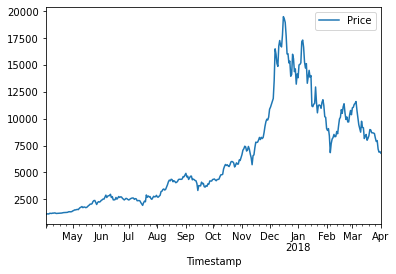

In [175]:
df.plot()

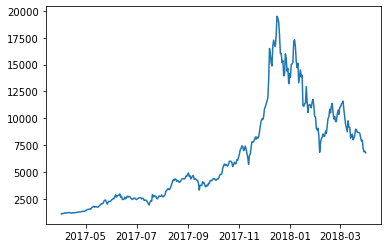

In [176]:
plt.plot(df.index, df["Price"])

In [178]:
x =np.arange(-10, 11)

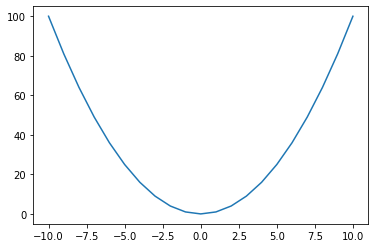

In [179]:
plt.plot(x, x**2)

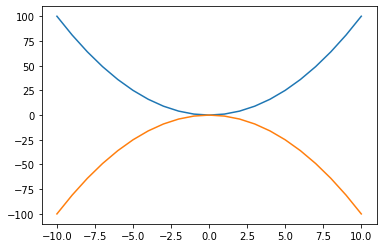

In [195]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0.5, 1.0, 'My Nice Plot')

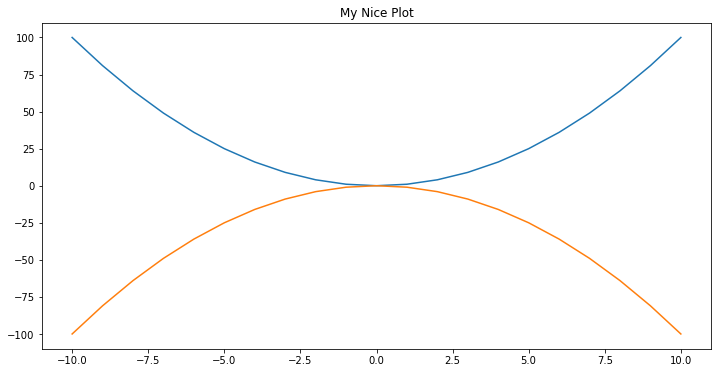

In [182]:
plt.figure(figsize = (12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x **2))

plt.title("My Nice Plot")

<AxesSubplot:title={'center':'Bitcoin Price 2017 - 2018'}, xlabel='Timestamp'>

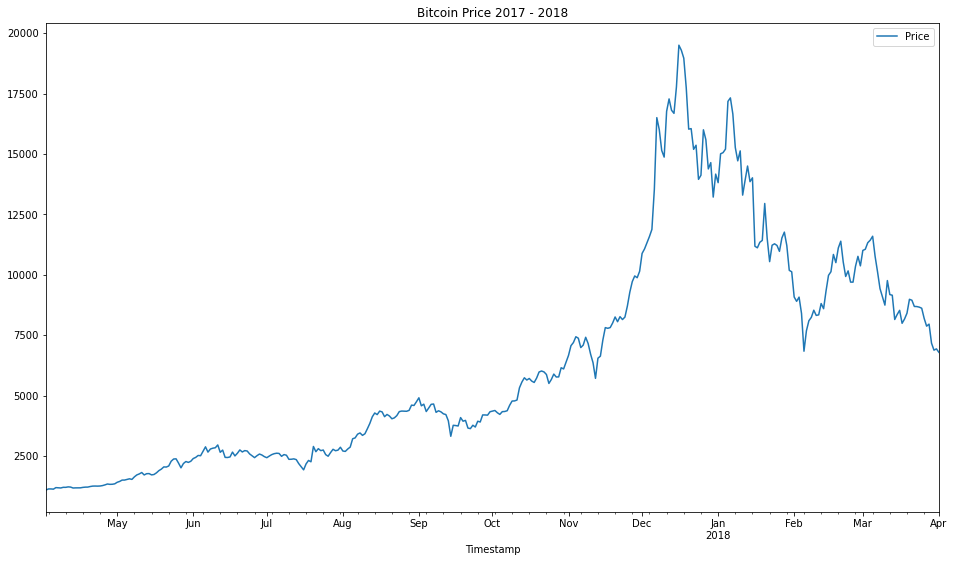

In [183]:
df.plot(figsize = (16, 9), title = "Bitcoin Price 2017 - 2018")

### A more challenging parsing ###

In [184]:
eth=pd.read_csv("C:\\Users\\user\\Downloads\\eth-price.csv")

In [185]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [196]:
eth=pd.read_csv("C:\\Users\\user\\Downloads\\eth-price.csv", parse_dates = True)

print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [197]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [198]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [199]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

In [200]:
eth=pd.read_csv("C:\\Users\\user\\Downloads\\eth-price.csv", parse_dates = True, index_col = 0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [201]:
prices = pd.DataFrame(index = df.index)

In [202]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [203]:
prices["Bitcoin"] = df["Price"]

In [204]:
prices["Ether"] = eth["Value"]

In [205]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

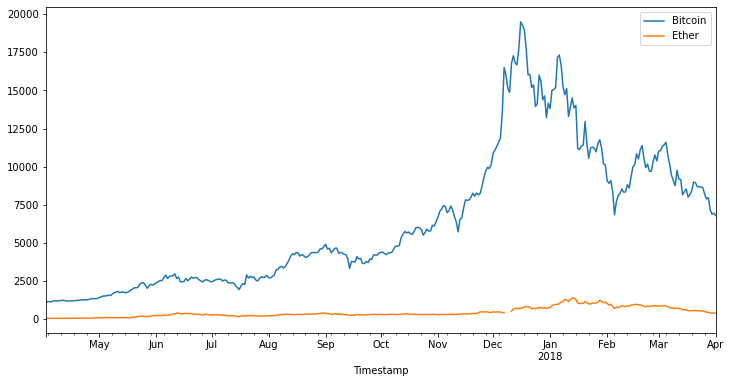

In [206]:
prices.plot(figsize = (12, 6))

<AxesSubplot:xlabel='Timestamp'>

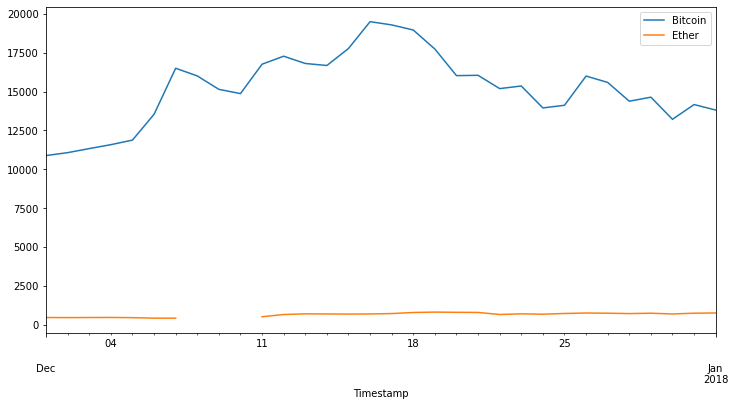

In [207]:
prices.loc["2017-12-01":"2018-01-01"].plot(figsize = (12, 6))